In [1]:
import numpy as np
import pImpactR as impact
import matplotlib.pyplot as plt

In [2]:
nturn = 512
betx  = 1.9065054393933862
alfx  = 1.408226172730429

In [3]:
beam, lattice = impact.readInputFile('test_IOTA.in')
ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
indexTBTF,TBTFtmp = impact.readTBT(60000+nturn,ke,mass,freq)
indexTBTB,TBTB = impact.readTBT(90000+nturn,ke,mass,freq)
print(TBTFtmp.shape,TBTB.shape)
nturn,idim,npt = TBTB.shape
TBTF = np.zeros([nturn,idim,npt])

(512, 6, 5739) (512, 6, 5650)


In [5]:
def findSameIndex(table1,index1,table2,index2):
    for i in range(len(table1)-index1+1):
        if table1[index1] == table2[index2]:
            return index2
        else:
            index2 = index2+1

In [6]:
k=0
for i in range(npt):
    k = findSameIndex(indexTBTB,i,indexTBTF,k)
    TBTF[:,:,i]=TBTFtmp[:,:,k]
TBTFtmp = 0    

In [7]:
X0 = TBTF[:,0,:] -1j*(betx*TBTF[:,1,:]+alfx*TBTF[:,0,:])
Y0 = TBTF[:,2,:] -1j*(betx*TBTF[:,3,:]+alfx*TBTF[:,2,:])
X1 = TBTB[::-1,0,:] - 1j*(betx*TBTB[::-1,1,:]+alfx*TBTB[::-1,0,:])
Y1 = TBTB[::-1,2,:] - 1j*(betx*TBTB[::-1,3,:]+alfx*TBTB[::-1,2,:])

In [8]:
Xdiff = np.abs(X1-X0)**2
Ydiff = np.abs(Y1-Y0)**2
Adiff = Xdiff+Ydiff
Xdiff=np.sqrt(np.sum(Xdiff,0)/nturn)
Ydiff=np.sqrt(np.sum(Ydiff,0)/nturn)
Adiff=np.sqrt(np.sum(Adiff,0)/nturn)
XdiffLog = np.log10(Xdiff+1.0e-15)
YdiffLog = np.log10(Ydiff+1.0e-15)
AdiffLog = np.log10(Adiff+1.0e-15)
iMaxX = np.argmax(Xdiff)
iMaxY = np.argmax(Ydiff)
iMaxA = np.argmax(Adiff)
iMinX = np.argmin(Xdiff)
iMinY = np.argmin(Ydiff)
iMinA = np.argmin(Adiff)

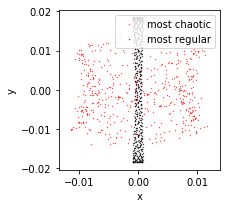

In [9]:
plt.figure(figsize=[3.3,3])
plt.scatter(TBTF[:,0,iMaxA],TBTF[:,2,iMaxA],c='r',s=0.1)
plt.scatter(TBTF[:,0,iMinA],TBTF[:,2,iMinA],c='k',s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['most chaotic','most regular'],loc=1)
plt.tight_layout()
plt.savefig('FB.Poincare.A.png',dpi=180)
# plt.close()

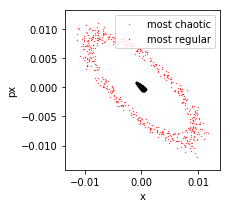

In [10]:
plt.figure(figsize=[3.3,3])
plt.scatter(TBTF[:,0,iMaxA],TBTF[:,1,iMaxA],c='r',s=0.1)
plt.scatter(TBTF[:,0,iMinA],TBTF[:,1,iMinA],c='k',s=0.1)
plt.xlabel('x')
plt.ylabel('px')
plt.legend(['most chaotic','most regular'],loc=1)
plt.tight_layout()
plt.savefig('FB.Poincare.X.png',dpi=180)
# plt.close()


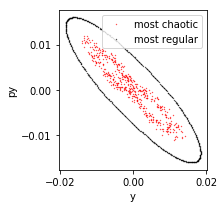

In [11]:
plt.figure(figsize=[3.3,3])
plt.scatter(TBTF[:,2,iMaxA],TBTF[:,3,iMaxA],c='r',s=0.1)
plt.scatter(TBTF[:,2,iMinA],TBTF[:,3,iMinA],c='k',s=0.1)
plt.xlabel('y')
plt.ylabel('py')
plt.legend(['most chaotic','most regular'],loc=1)
plt.tight_layout()
plt.savefig('FB.Poincare.Y.png',dpi=180)
# plt.close()

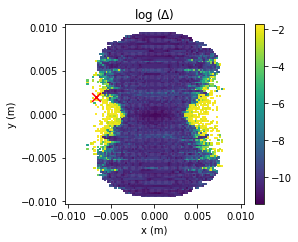

In [12]:
xmax = np.max([TBTF[0,0,:],TBTF[0,2,:]])
plt.figure(figsize=[4,3.3])
f1=plt.scatter(TBTF[0,0,:],TBTF[0,2,:],c=AdiffLog,s=1.6,marker='s')
plt.scatter(TBTF[0,0,iMaxA],TBTF[0,2,iMaxA],c='r',s=77,marker='x')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'log ($\Delta$)')
plt.xlim(-xmax*1.1,xmax*1.1)
plt.ylim(-xmax*1.1,xmax*1.1)
plt.colorbar(f1)
plt.savefig('FB.DA.Log.A.png',dpi=180)
# plt.close()

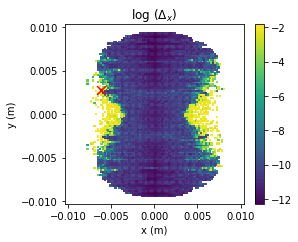

In [13]:
plt.figure(figsize=[4,3.3])
f1=plt.scatter(TBTF[0,0,:],TBTF[0,2,:],c=XdiffLog,s=1.6,marker='s')
plt.scatter(TBTF[0,0,iMaxX],TBTF[0,2,iMaxX],c='r',s=77,marker='x')
plt.xlim(-xmax*1.1,xmax*1.1)
plt.ylim(-xmax*1.1,xmax*1.1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'log ($\Delta_x$)')
plt.colorbar(f1)
plt.savefig('FB.DA.Log.X.png',dpi=180)
# plt.close()

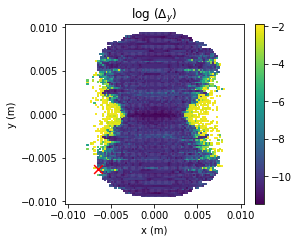

In [14]:
plt.figure(figsize=[4,3.3])
f1=plt.scatter(TBTF[0,0,:],TBTF[0,2,:],c=YdiffLog,s=1.6,marker='s')
plt.scatter(TBTF[0,0,iMaxY],TBTF[0,2,iMaxY],c='r',s=77,marker='x')
plt.xlim(-xmax*1.1,xmax*1.1)
plt.ylim(-xmax*1.1,xmax*1.1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'log ($\Delta_y$)')
plt.colorbar(f1)
plt.savefig('FB.DA.Log.Y.png',dpi=180)
# plt.close()